# Regresión lineal: Comparación de valores de regularización
M2U3 - Ejercicio 3

## ¿Qué vamos a hacer?
- Crear un dataset sintético para regresión lineal multivariable con un término de error aleatorio
- Entrenar 3 modelos de regresión lineal diferentes sobre dicho dataset con diferentes valores de *lambda*
- Comparar el efecto del valor de *lambda* sobre el modelo, su precisión y sus residuos

Recuerda seguir las instrucciones para las entregas de prácticas indicadas en [Instrucciones entregas](https://github.com/Tokio-School/Machine-Learning/blob/main/Instrucciones%20entregas.md).

## Crear un dataset sintético con error para entrenamiento y test final

Vamos a comenzar, como siempre, creando un dataset sintético para regresión lineal, con términos de bias y de error, de forma manual o con los métodos de Scikit-learn.

En esta ocasión vamos a crear 2 datasets, uno para entrenamiento y otro para test final, siguiendo el mismo patrón aunque con tamaños diferentes. Vamos a entrenar los modelos con el primer dataset y comprobar posteriormente con el segundo cómo se comportarían ante datos que no han "visto" previamente en el proceso de entrenamiento, que son completamente nuevos para ellos.

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt


from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


In [2]:
# TODO: Genera un dataset sintéitico, con término de bias y término de error


X, y, coef = make_regression(n_samples= 1000, n_features= 5, noise= 0.35, coef= True, bias= 1, random_state= 33)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)



# Comprueba los valores y dimensiones de los vectores
print('Theta a estimar y sus dimensiones:')
print(coef)
print(coef.shape)

print('\nPrimeras 10 filas de X:')
print(X[:10, :])

print('\nPrimeros 10 valores de Y:')
print(y[:10])

print('\nDimensiones de X e Y:')
print(X.shape, y.shape, y.shape)

Theta a estimar y sus dimensiones:
[54.13778729 69.37005134 10.55336389 46.15942799 70.72999658]
(5,)

Primeras 10 filas de X:
[[ 1.05411305 -2.8093946  -0.61556245 -0.65356012  0.43744255]
 [ 0.44538381 -0.56066916 -0.83449313  0.25805736  0.19594261]
 [-0.1613375  -1.06594459 -0.16258231 -1.06762744  0.03587425]
 [-0.62989423 -0.60145897 -1.0189355  -0.4066161  -0.92511345]
 [-0.43854931 -1.04721799 -0.5866803   0.08717377 -2.33764126]
 [-0.68286956  0.25852198 -0.74874376  0.27357532  0.00572875]
 [-1.14454575 -0.34152512  0.7818867  -1.87955847 -0.17398044]
 [-0.16649578  1.36499932  0.40798428  0.31250176 -1.2972496 ]
 [-0.55339663 -2.26845468  1.01356087  0.30851933 -0.59851449]
 [ 1.70298451  0.90983224  1.3938377  -0.27010575 -0.76798787]]

Primeros 10 valores de Y:
[-141.8318726     3.61118805 -130.31820342 -170.58961103 -262.12362973
  -12.88228556 -175.16080844   13.24260971 -203.76476948  104.47384063]

Dimensiones de X e Y:
(1000, 5) (1000,) (1000,)


## Entrenar 3 modelos diferentes con diferentes valores de *lambda*

Ahora vamos a entrenar 3 modelos diferentes con diferentes valores de *lambda*.

Para ello, comienza por copiar tus celdas con el código que implementa la función de coste y el gradient descent regularizados:

In [3]:
# TODO: Copia aquí las celdas o el código para implementar 2 funciones con la función de coste y el gradient descent regularizados

def regularized_cost_function(x, y, theta, lambda_=0.):

    m = len(y)  # número de ejemplos

    # Predicciones del modelo
    predictions = x @ theta
    error = predictions - y

    # Coste base (MSE)
    cost = (1 / (2 * m)) * np.sum(error ** 2)

    # Regularización (no incluye theta[0])
    reg_term = (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)

    j = cost + reg_term

    # Asegurar que devolvemos float
    return float(j)



def regularized_gradient_descent(x, y, theta, alpha, lambda_=0., e=1e-6, iter_=1000):

    m, n = x.shape
    j_hist = []

    theta = theta.copy()  # evitar modificar el original

    for k in range(iter_):
        predictions = x @ theta
        error = predictions - y

        theta_iter = theta.copy()

        for j in range(n):
            grad = (1/m) * np.sum(error * x[:, j])  # gradiente base

            if j > 0:
                theta_iter[j] = theta[j]*(1 - alpha*lambda_/m) - alpha*grad
            else:
                theta_iter[j] = theta[j] - alpha*grad

        theta = theta_iter

        # Calculamos el coste con regularización
        cost = regularized_cost_function(x, y, theta, lambda_)
        j_hist.append(cost)

        # Comprobamos convergencia
        if k > 0 and abs(j_hist[-2] - j_hist[-1]) < e:
            print(f"Converge en la iteración nº {k}")
            break
    else:
        print("Nº máximo de iteraciones alcanzado")

    return j_hist, theta


Vamos a entrenar los modelos. Para ello, recuerda que con Jupyter puedes simplemente modificar las celdas de código y las variables quedarán en la memoria del kernel de Jupyter.

Por tanto, puedes p. ej. modificar el nombre de las siguientes variables, cambiando "1" por "2" y "3", y simplemente reejecutar la celda para almacenar los resultados de los 3 modelos, mientras que las variables de anteriores modelos siguen estando disponibles.

Si te encuentras con alguna dificultad, también puedes copiar varias veces la celda de código y tener 3 celdas para entrenar a 3 modelos con nombres de variables diferentes.

In [4]:
# TODO: Comprueba tu implementación entrenando un modelo sobre el dataset sintético creado previamente

# Crea una theta inicial con un valor constante dado (por esta vez, no de forma aleatoria).
theta_ini = np.ones(X.shape[1]) * 0.3

print('Theta inicial:')
print(theta_ini)

alpha = 1e-1
lambda_ = [1e-3, 1e-1, 1e1]    # Usaremos 3 valores diferentes
e = 1e-3
iter_ = int(1e3)


print('Hiper-arámetros usados:')
print('Alpha:', alpha, 'Error máx.:', e, 'Nº iter', iter_)

t = time.time()

j_hist_1, theta_final_1 = regularized_gradient_descent(X_train, y_train, theta=theta_ini, alpha=alpha, lambda_=lambda_[0], e=e, iter_=iter_)
j_hist_2, theta_final_2 = regularized_gradient_descent(X_train, y_train, theta=theta_ini, alpha=alpha, lambda_=lambda_[1], e=e, iter_=iter_)
j_hist_3, theta_final_3 = regularized_gradient_descent(X_train, y_train, theta=theta_ini, alpha=alpha, lambda_=lambda_[2], e=e, iter_=iter_)


print('Tiempo de entrenamiento (s):', time.time() - t)

# TODO: completar
print('\nÚltimos 10 valores de la función de coste')
print(j_hist_1[-10:])

print('\nCoste final:')
print(j_hist_1[-1])

print('\nTheta final:')
print(theta_final_1)
print(theta_final_2)
print(theta_final_3)

print('Valores verdaderos de Theta y diferencia con valores entrenados:')
print(coef)
print(theta_final_1 - coef)

Theta inicial:
[0.3 0.3 0.3 0.3 0.3]
Hiper-arámetros usados:
Alpha: 0.1 Error máx.: 0.001 Nº iter 1000
Converge en la iteración nº 64
Converge en la iteración nº 64
Converge en la iteración nº 64
Tiempo de entrenamiento (s): 0.05298948287963867

Últimos 10 valores de la función de coste
[0.6010971123867149, 0.5954766363001754, 0.5909603702194265, 0.587330460042975, 0.5844122048680772, 0.5820654767980681, 0.5801778528439128, 0.5786591161358019, 0.5774368525096558, 0.5764529235122152]

Coste final:
0.5764529235122152

Theta final:
[54.0742908  69.3442008  10.55152746 46.19427128 70.71806474]
[54.07465497 69.33598156 10.55059317 46.18815953 70.70936291]
[54.11063749 68.52367327 10.45790918 45.58490435 69.84971451]
Valores verdaderos de Theta y diferencia con valores entrenados:
[54.13778729 69.37005134 10.55336389 46.15942799 70.72999658]
[-0.0634965  -0.02585054 -0.00183643  0.03484329 -0.01193184]


## Comprobar gráficamente el efecto de *lambda* sobre los modelos

Ahora vamos a comprobar los 3 modelos entre sí.

Vamos a comenzar por comprobar el coste final, una representación de la precisión de los mismos:

Coste final de los 3 modelos:
0.5764529235122152
1.3729001544444253
80.0388644387075


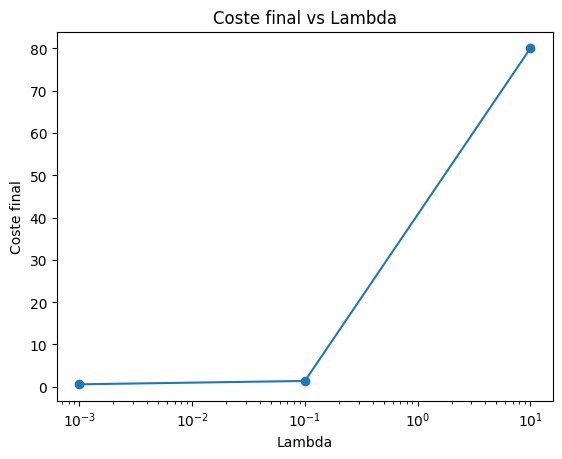

In [5]:
# TODO: Muestra el coste final de los 3 modelos:

print('Coste final de los 3 modelos:')
print(j_hist_1[-1])
print(j_hist_2[-1])
print(j_hist_3[-1])

costes_finales = [j_hist_1[-1], j_hist_2[-1], j_hist_3[-1]]

# Representa visualmente el coste frente a los valores de lambda con un gráfico de líneas y puntos
plt.plot(lambda_, costes_finales, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coste final')
plt.title('Coste final vs Lambda')
plt.show()

*¿Cómo afecta un mayor valor de *lambda* al coste final en este dataset?*

Vamos a representar los dataset de entrenamiento y test, para comprobar que siguen un patrón similar:

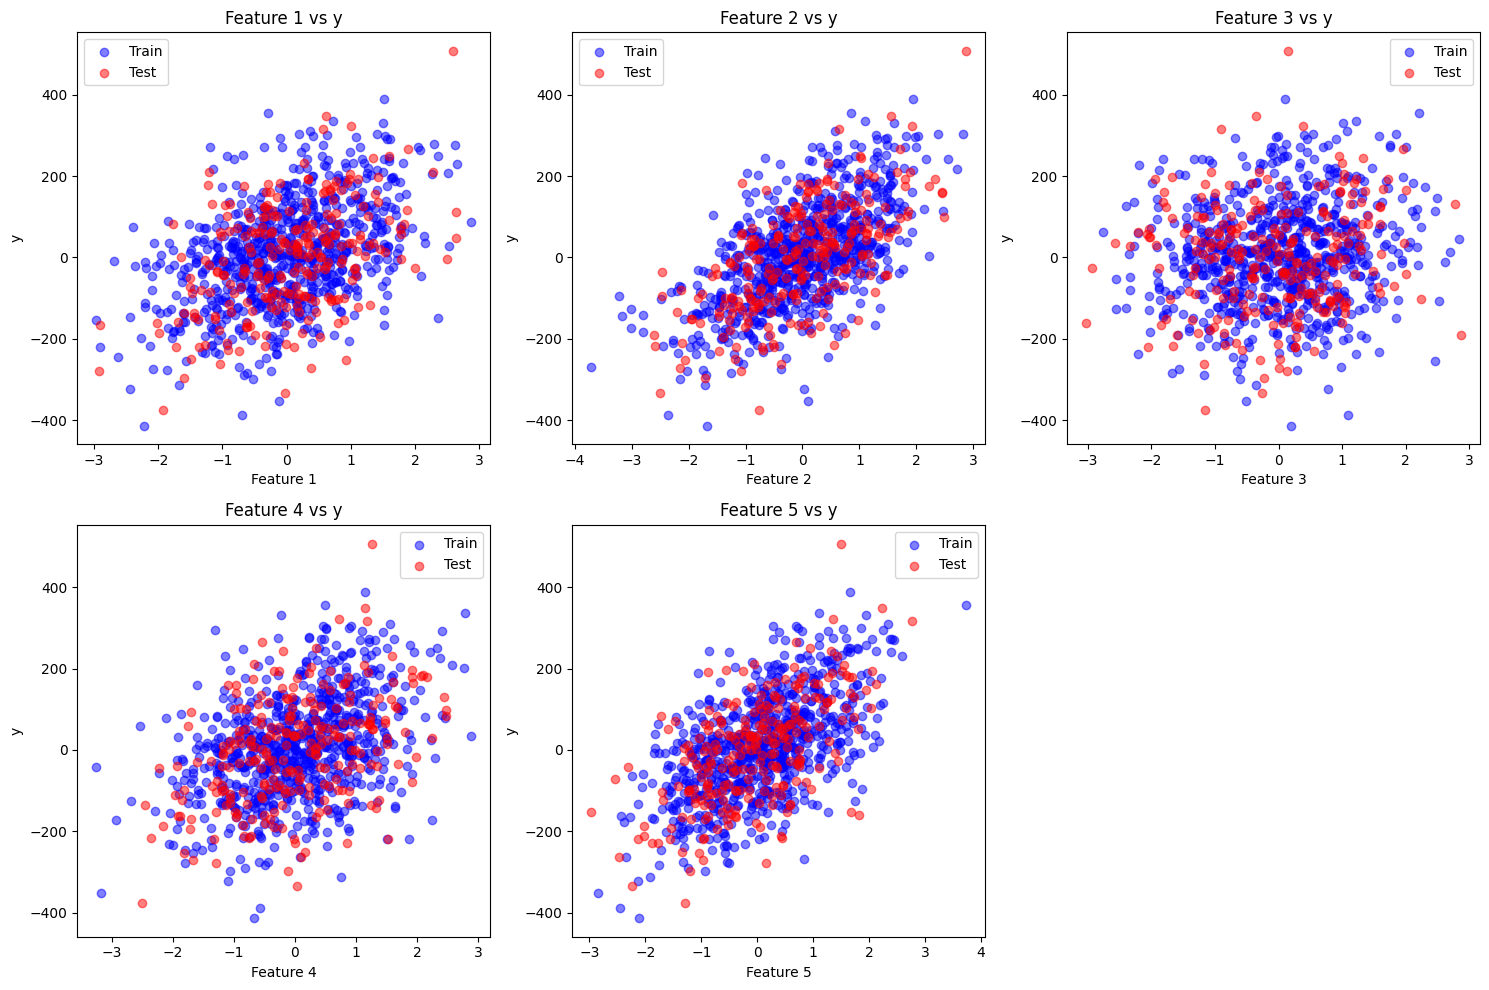

In [6]:
plt.figure(figsize=(15, 10))

for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.scatter(X_train[:, i], y_train, alpha=0.5, color='blue', label='Train')
    plt.scatter(X_test[:, i], y_test, alpha=0.5, color='red', label='Test')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('y')
    plt.title(f'Feature {i+1} vs y')
    plt.legend()
plt.tight_layout()
plt.show()




Ahora vamos a comprobar las predicciones de cada modelo sobre el dataset de entrenamiento, para comprobar cómo se ajusta la recta a los valores de entrenamiento en cada caso:

In [7]:
# TODO: Calcula las predicciones para cada modelo sobre X_train

X_train_bias = np.insert(X_train, 0, 1, axis=1)

Y_train_pred1 = X_train @ theta_final_1
Y_train_pred2 = X_train @ theta_final_2
Y_train_pred3 = X_train @ theta_final_3


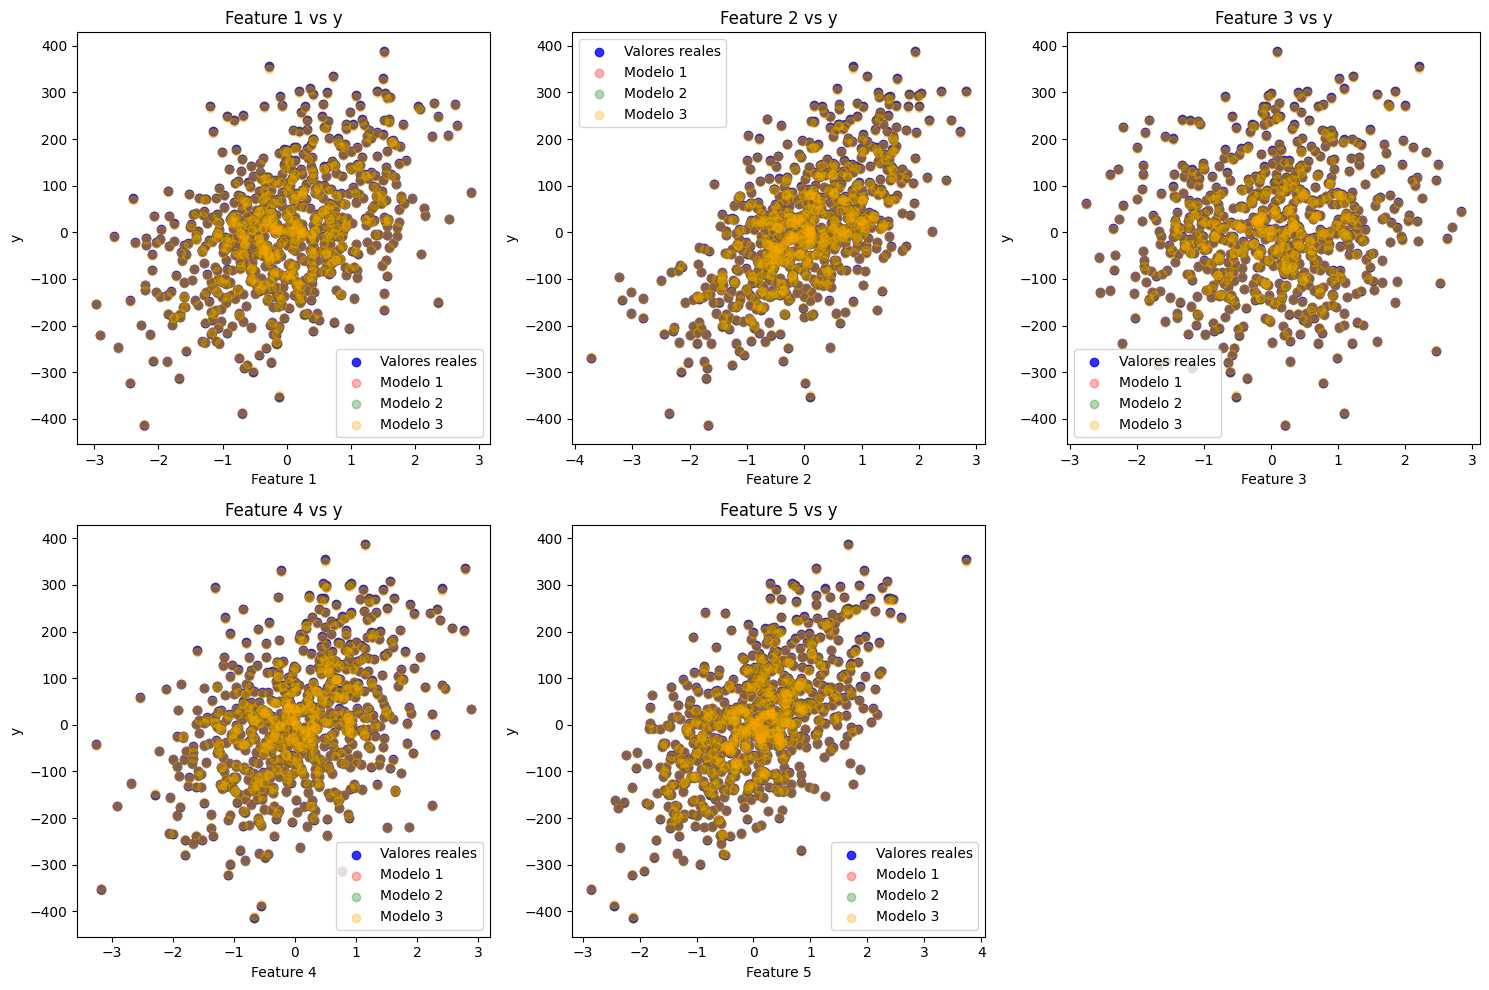

In [8]:
plt.figure(figsize=(15, 10))

for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.scatter(X_train[:, i], y_train, color='blue', alpha=0.8, label='Valores reales')
    plt.scatter(X_train[:, i], Y_train_pred1, color='red', alpha=0.3, label='Modelo 1')
    plt.scatter(X_train[:, i], Y_train_pred2, color='green', alpha=0.3, label='Modelo 2')
    plt.scatter(X_train[:, i], Y_train_pred3, color='orange', alpha=0.3, label='Modelo 3')

    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('y')
    plt.title(f'Feature {i+1} vs y')
    plt.legend()

plt.tight_layout()
plt.show()


Al tener el dataset de entrenamiento un término de error, puede haber diferencias significativas entre los datos del dataset de entrenamiento y el dataset de test. Puedes jugar con varios valores de dicho término para aumentar o disminuir la diferencia.

Vamos a comprobar qué ocurre con las predicciones cuando las representamos sobre el dataset de test, sobre datos que los modelos no han visto anteriormente:

In [9]:
# TODO: Calcula las predicciones para cada modelo sobre X_test

Y_test_pred1 = X_test @ theta_final_1
Y_test_pred2 = X_test @ theta_final_2
Y_test_pred3 = X_test @ theta_final_3

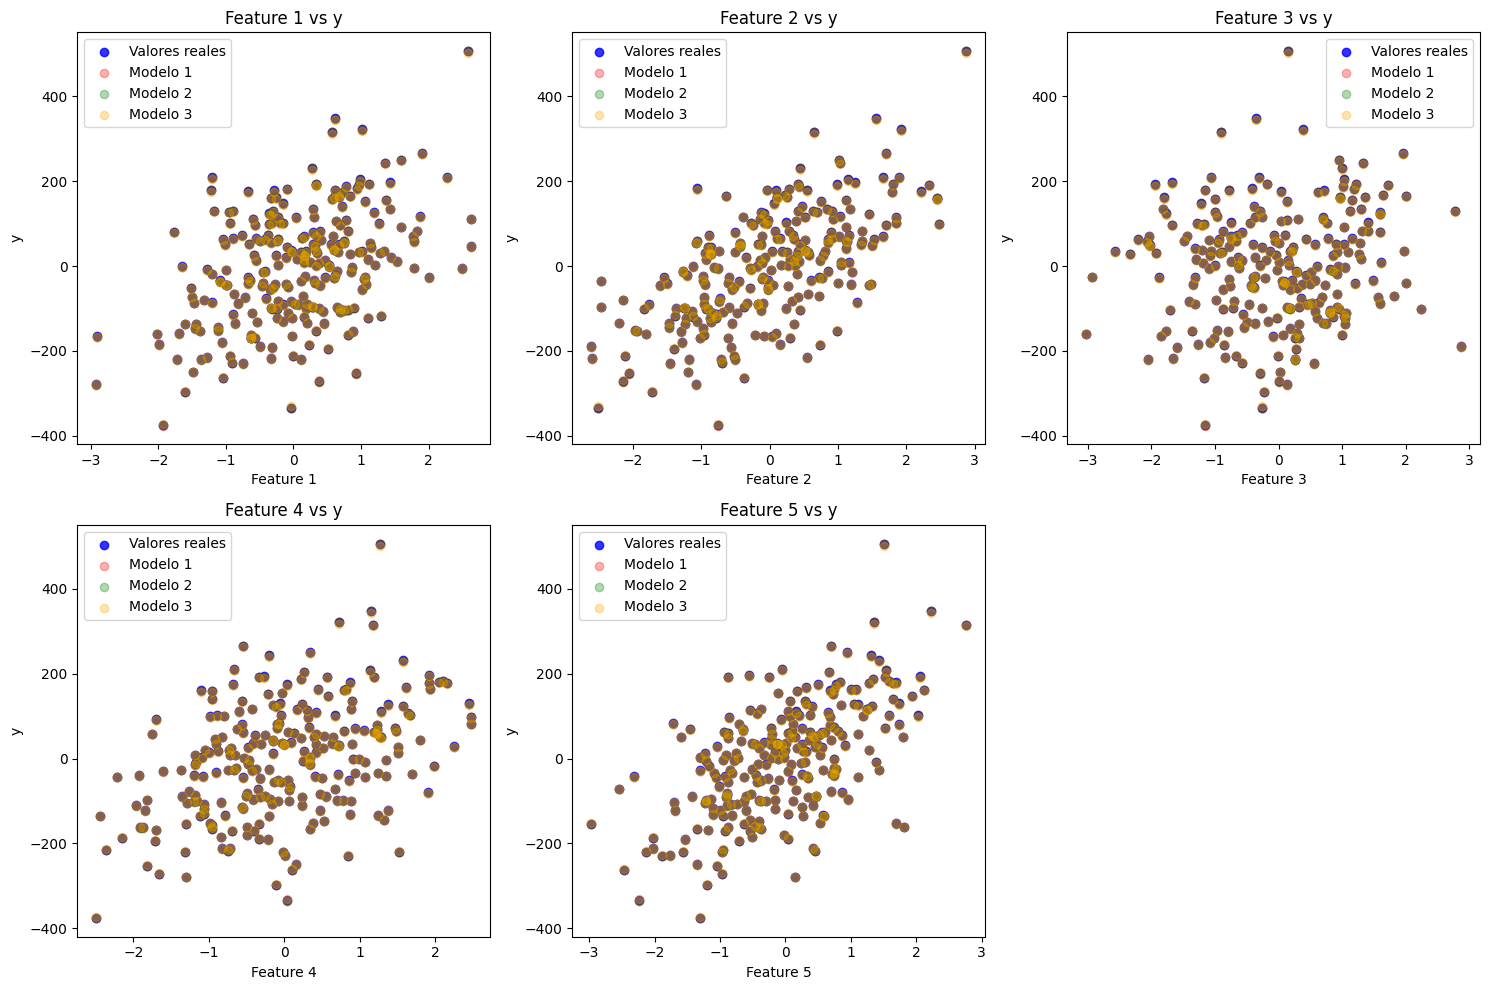

In [10]:
plt.figure(figsize=(15, 10))

for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.scatter(X_test[:, i], y_test, color='blue', alpha=0.8, label='Valores reales')
    plt.scatter(X_test[:, i], Y_test_pred1, color='red', alpha=0.3, label='Modelo 1')
    plt.scatter(X_test[:, i], Y_test_pred2, color='green', alpha=0.3, label='Modelo 2')
    plt.scatter(X_test[:, i], Y_test_pred3, color='orange', alpha=0.3, label='Modelo 3')

    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('y')
    plt.title(f'Feature {i+1} vs y')
    plt.legend()

plt.tight_layout()
plt.show()


¿Qué sucede? En algunos casos, en función de los parámetros utilizados puede que te sea más o menos fácil apreciarlo.

Cuando el modelo tiene un factor de regulación *lambda* bajo o nulo, se ajusta demasiado a los datos con los que se entrena, consiguiendo una curva muy pegada y una precisión máxima... sólo sobre dicho dataset.

Sin embargo, en la vida real, posteriormente pueden llegar datos sobre los que no hemos entrenado el modelo que tengan alguna pequeña variación sobre los datos originales.

En dicha situación vamos a preferir un valor de *lambda* más alto, que nos permita tener una precisión mayor para los nuevos datos, aunque perdamos algo de precisión para los datos del dataset de entrenamiento.

Por tanto, buscamos que un modelo "generalice" y pueda hacer buenas predicciones sobre nuevos datos, en lugar de que simplemente "memorice" los resultados que ya ha visto.

Podemos por tanto pensar en la regularización como un alumno que tiene las preguntas del examen antes de presentarse:
- Si luego le caen dichas preguntas, va a tener una nota (o precisión) muy alta, puesto que ya "ha visto" las preguntas previamente.
- Si luego las preguntas son diferentes, puede tener una nota bastante alta, en función de lo similares que sean.
- Sin embargo, si las preguntas son totalmente diferentes, va a tener una nota muy baja, porque no es que hubiera estudiado mucho la asignatura, sino que sus notas eran altas sólo por saber el resultado de antemano.

## Comprobar los residuos sobre el subset de test final

Representa los residuos para los 3 modelos gráficamente. De esta forma vas a poder comparar tus 3 modelos sobre los 2 datasets.

Calcúlalos tanto para el dataset de entrenamiento como para el de testing. Puedes hacerlo con celdas diferentes para poder apreciar sus diferencias a la vez.

*Consejos*:
- Cuidado con las escalas de los ejes X e Y a la hora de hacer las comparaciones.
- Para poder verlos a la vez, puedes crear 3 subgráficas horizontales, en lugar de verticales, con "plt.subplots(1, 3)".
- Utiliza colores diferentes para cada uno de los 3 modelos.

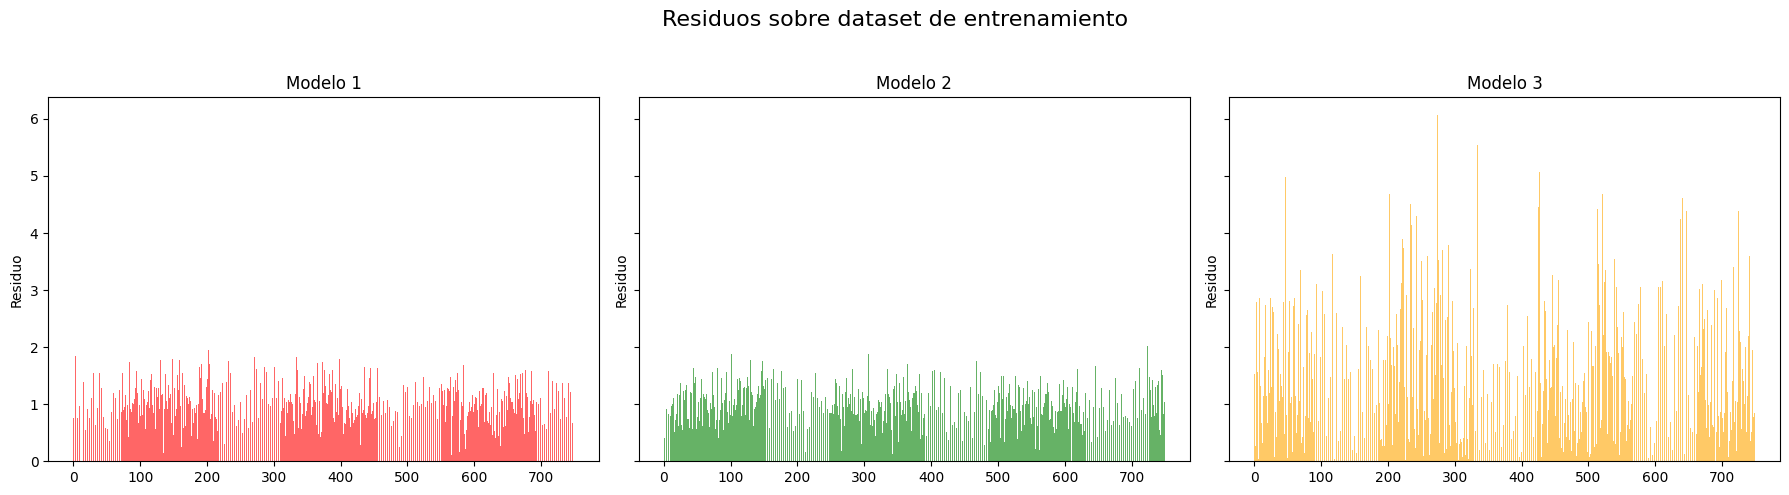

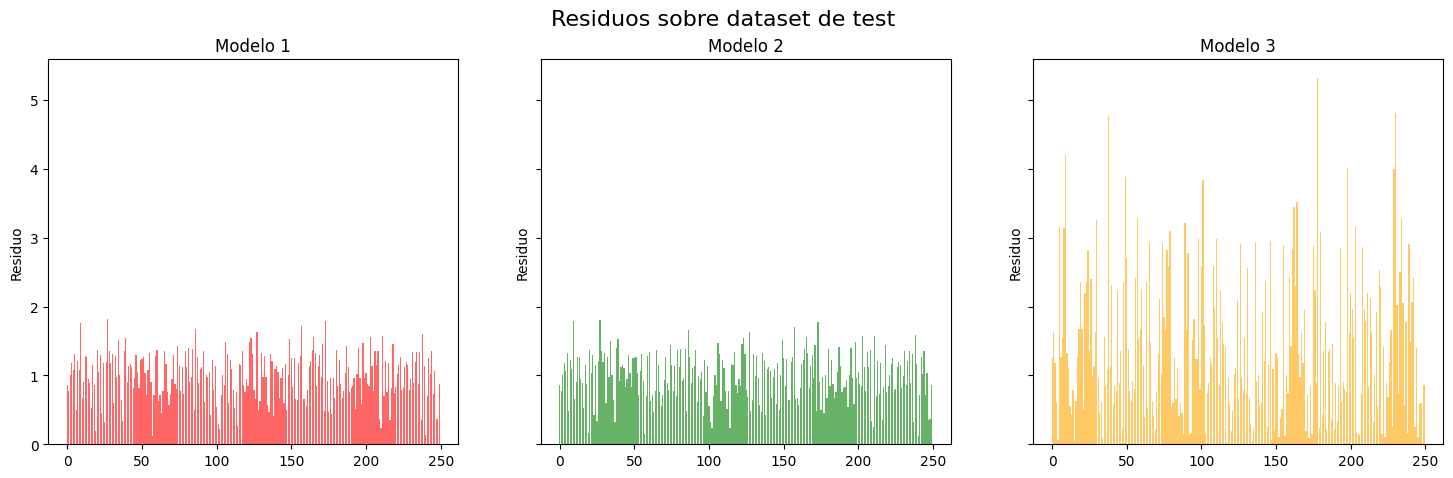

In [11]:
import matplotlib.pyplot as plt
import numpy as np

Y_preds = [Y_train_pred1, Y_train_pred2, Y_train_pred3]
colors = ['red', 'green', 'orange']

# --- Residuos train ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('Residuos sobre dataset de entrenamiento', fontsize=16)

for i in range(3):
    residuos = np.abs(y_train - Y_preds[i])

    axes[i].bar(range(len(residuos)), residuos, color=colors[i], alpha=0.6)
    axes[i].set_title(f"Modelo {i + 1}")
    axes[i].set_ylabel('Residuo')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Y_predst = [Y_test_pred1, Y_test_pred2, Y_test_pred3]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('Residuos sobre dataset de test', fontsize=16)

for i in range(3):
    residuos = np.abs(y_test - Y_predst[i])

    axes[i].bar(range(len(residuos)), residuos, color=colors[i], alpha=0.6)
    axes[i].set_title(f"Modelo {i + 1}")
    axes[i].set_ylabel('Residuo')

plt.show()


Si no aprecias claramente dichos efectos sobre tus datasets, puedes probar a modificar los valores iniciales:
- Con un nº de ejemplos *m* mayor, para que los modelos puedan ser más precisos.
- Con un término de error mayor, para que haya más diferencia o variación entre ejemplos.
- Con un tamaño del dataset de test sobre el de entrenamiento menor, para que haya más diferencias entre ambos datasets (al tener más datos, los valores pueden suavizarse más).
- Etc.